In [178]:
import pandas as pd
import os
import zipfile

# Ensure you have Kaggle API configured and installed
# !kaggle datasets download -d sevgisarac/temperature-change

# Extract dataset if it's a ZIP file
dataset_zip = "temperature-change.zip"
if os.path.exists(dataset_zip):
    with zipfile.ZipFile(dataset_zip, "r") as zip_ref:
        zip_ref.extractall("temperature_change_data")

# Path to extracted files
path = "temperature_change_data"

# List all files
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['.ipynb_checkpoints', 'FAOSTAT_data_1-10-2022.csv', 'Environment_Temperature_change_E_All_Data_NOFLAG.csv', 'FAOSTAT_data_11-24-2020.csv', 'FAOSTAT_data_en_11-1-2024.csv']


In [179]:
import pandas as pd
import numpy as np

df_full = pd.read_csv('/content/temperature_change_data/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding="ISO-8859-1")

print(df_full.columns)

#Pun anul ca si valoare in coloana si pentru asta elimini coloanele cu text si le pastrez pe cele cu coduri
df_full.drop(columns=["Area","Months","Element","Unit"], inplace=True)
df_full_clean = df_full.melt(id_vars=["Area Code", "Months Code", "Element Code"], var_name="Year", value_name="Value")
df_full_clean.to_csv("df_full_clean.csv", index=False)
df_full_clean["Year"] = df_full_clean["Year"].str.extract('(\d+)').astype(int)

Index(['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')


In [180]:
#iau si datele din 2022 si pastrez doar area code, element code, months code, year si value
df_2022 = pd.read_csv('/content/temperature_change_data/FAOSTAT_data_1-10-2022.csv', encoding='ISO-8859-1')
df_2022.rename(columns={"Area Code (FAO)":"Area Code"}, inplace=True)
df_selected_2022 = df_2022[["Area Code", "Element Code", "Months Code", "Year", "Value"]]
print(df_selected_2022.head())
df_selected_2022.to_csv("df_selected_2022.csv", index=False)

   Area Code  Element Code  Months Code  Year  Value
0          2          7271         7001  1961  0.746
1          2          7271         7001  1962  0.009
2          2          7271         7001  1963  2.695
3          2          7271         7001  1964 -5.277
4          2          7271         7001  1965  1.827


In [181]:
#in 2024 nu am area code am M49 code si atunci trebuie sa inlocuiesc m49 code cu area code din fisierul din 2020
df_2024 = pd.read_csv('/content/temperature_change_data/FAOSTAT_data_en_11-1-2024.csv', encoding='ISO-8859-1')
df_2024.rename(columns={"Area Code (M49)":"Area Code"}, inplace=True)
df_2020=pd.read_csv('/content/temperature_change_data/FAOSTAT_data_11-24-2020.csv', encoding='ISO-8859-1')
df_2020.rename(columns=lambda x: x.strip().replace("ï»¿\"", ""), inplace=True)
df_2020.rename(columns=lambda x: x.strip().replace("\"", ""), inplace=True)
df_2020 = df_2020[["Country Code", "M49 Code"]]
df_2024 = df_2024.merge(df_2020[['M49 Code', 'Country Code']], left_on='Area Code', right_on='M49 Code', how='left')

# Actualizăm coloana 'Area Code' cu valorile din 'Country Code'
df_2024['Area Code'] = df_2024['Country Code']

# Ștergem coloanele suplimentare (M49 Code, Country Code)
df_2024.drop(columns=['M49 Code', 'Country Code'], inplace=True)

df_selected_2024 = df_2024[["Area Code", "Element Code", "Months Code", "Year", "Value"]]
#elimin valorie null sau infinit care sunt gresite pentru Area Code
df_selected_2024 = df_selected_2024[~df_selected_2024['Area Code'].isna()]
df_selected_2024 = df_selected_2024[~df_selected_2024['Area Code'].isin([float('inf'), float('-inf')])]
df_selected_2024["Area Code"] = df_selected_2024['Area Code'].astype(int)

# Afișează primele linii pentru a verifica
print(df_selected_2024.head())
df_selected_2024.to_csv("df_selected_2024.csv", index=False)

   Area Code  Element Code  Months Code  Year  Value
0          2          7271         7001  1961  0.745
1          2          7271         7001  1962  0.015
2          2          7271         7001  1963  2.706
3          2          7271         7001  1964 -5.250
4          2          7271         7001  1965  1.854


In [182]:
#combin cele 3 df
df_combined = pd.concat([df_full_clean,df_selected_2022,df_selected_2024], ignore_index=True)
print(df_combined.head())
df_combined.to_csv("df_combined.csv", index=False)

   Area Code  Months Code  Element Code  Year  Value
0          2         7001          7271  1961  0.777
1          2         7001          6078  1961  1.950
2          2         7002          7271  1961 -1.743
3          2         7002          6078  1961  2.597
4          2         7003          7271  1961  0.516


In [183]:
#fac describe pe valoarea finala
print(df_combined.describe())

          Area Code   Months Code  Element Code          Year          Value
count  1.040451e+06  1.040451e+06  1.040451e+06  1.040451e+06  944175.000000
mean   5.088993e+02  7.009882e+03  6.944384e+03  1.990944e+03       0.544909
std    1.363050e+03  6.037945e+00  5.319543e+02  1.740521e+01       0.925293
min    1.000000e+00  7.001000e+03  6.078000e+03  1.961000e+03      -9.334000
25%    7.000000e+01  7.005000e+03  6.078000e+03  1.976000e+03       0.113000
50%    1.410000e+02  7.009000e+03  7.271000e+03  1.991000e+03       0.465000
75%    2.110000e+02  7.016000e+03  7.271000e+03  2.006000e+03       0.956000
max    5.873000e+03  7.020000e+03  7.271000e+03  2.023000e+03      11.759000


In [184]:
#Scot valorile null din df
print(df_combined.isna().sum())
# Verifică procentul de NaN în coloana 'Value'
nan_percentage = df_combined['Value'].isna().mean() * 100
print(f"Procentul de valori NaN în 'Value': {nan_percentage:.2f}%")

Area Code           0
Months Code         0
Element Code        0
Year                0
Value           96276
dtype: int64
Procentul de valori NaN în 'Value': 9.25%


In [185]:
# Șterge rândurile care au NaN în coloana 'Value'
df_combined = df_combined.dropna(subset=['Value'])
print(df_combined.isna().sum())

Area Code       0
Months Code     0
Element Code    0
Year            0
Value           0
dtype: int64


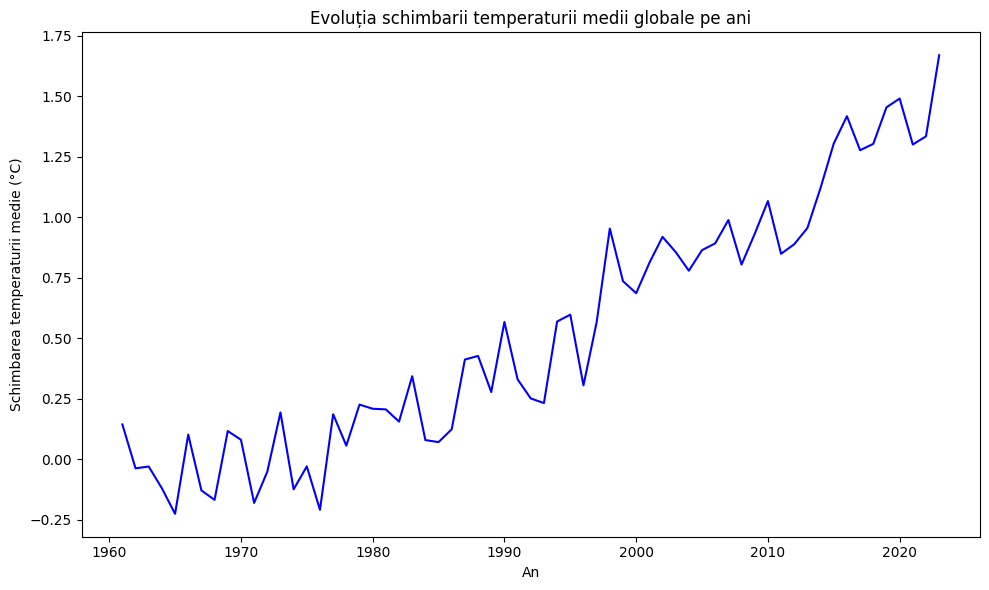

In [186]:
plt.figure(figsize=(10, 6))
df_temperature_change = df_combined[df_combined['Element Code'] == 7271]
# Calculăm media temperaturii pe an
df_avg_yearly = df_temperature_change.groupby('Year')['Value'].mean().reset_index()

# Creăm line plot-ul
sns.lineplot(data=df_avg_yearly, x='Year', y='Value', color='b')
plt.title('Evoluția schimbarii temperaturii medii globale pe ani')
plt.xlabel('An')
plt.ylabel('Schimbarea temperaturii medie (°C)')
plt.tight_layout()
plt.show()

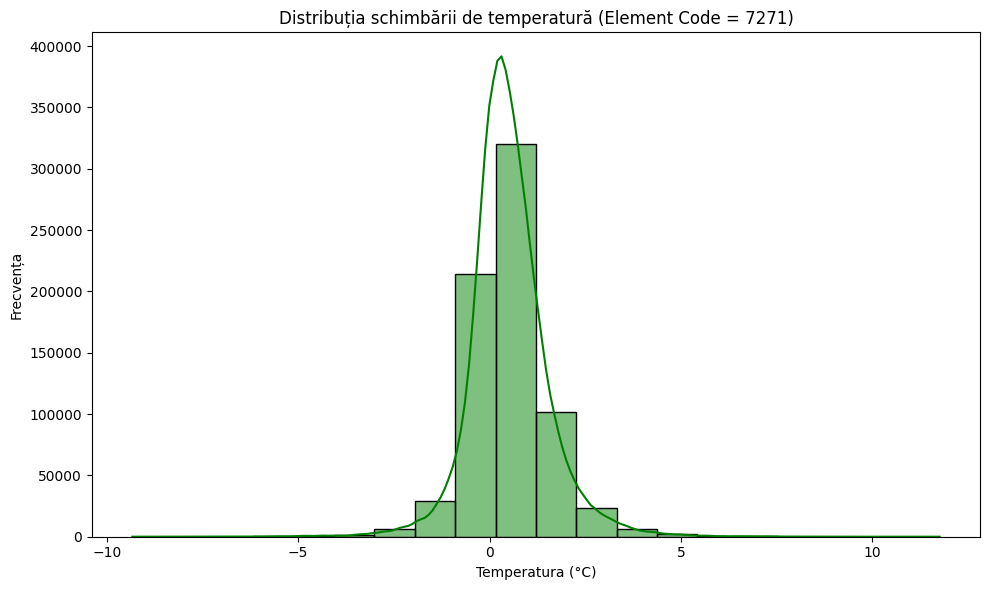

In [187]:
# Filtrăm doar rândurile în care 'Element Code' este 7271
df_temperature_change = df_combined[df_combined['Element Code'] == 7271]

# Creăm histogramă pentru distribuția temperaturilor doar pentru 'Element Code' = 7271
plt.figure(figsize=(10, 6))

sns.histplot(df_temperature_change['Value'], kde=True, color='g', bins=20)
plt.title('Distribuția schimbării de temperatură (Element Code = 7271)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecvența')
plt.tight_layout()
plt.show()

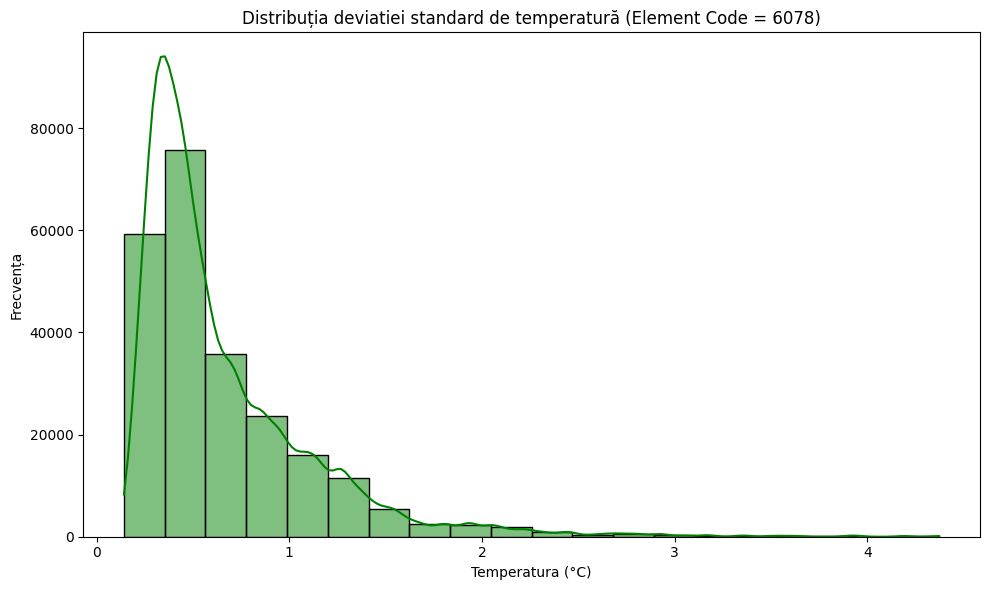

In [188]:
# Filtrăm doar rândurile în care 'Element Code' este 6078
df_temperature_change = df_combined[df_combined['Element Code'] == 6078]

# Creăm histogramă pentru distribuția temperaturilor doar pentru 'Element Code' = 6078
plt.figure(figsize=(10, 6))

sns.histplot(df_temperature_change['Value'], kde=True, color='g', bins=20)
plt.title('Distribuția deviatiei standard de temperatură (Element Code = 6078)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecvența')
plt.tight_layout()
plt.show()

In [189]:
# Filtrăm datele pentru fiecare Element Code
df_temperature_change = df_combined[df_combined['Element Code'] == 7271]  # Schimbarea temperaturii
df_std_deviation = df_combined[df_combined['Element Code'] == 6078]  # Deviatia standard

# Pentru schimbarea temperaturii, folosim IQR pentru a identifica outliers
Q1_temp = df_temperature_change['Value'].quantile(0.25)
Q3_temp = df_temperature_change['Value'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp

lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp

# Filtrăm valorile pentru schimbarea temperaturii
df_temperature_change_cleaned = df_temperature_change[
    (df_temperature_change['Value'] >= lower_bound_temp) &
    (df_temperature_change['Value'] <= upper_bound_temp)
]

# Pentru deviatie standard, folosim aceeași tehnică IQR
Q1_std = df_std_deviation['Value'].quantile(0.25)
Q3_std = df_std_deviation['Value'].quantile(0.75)
IQR_std = Q3_std - Q1_std

lower_bound_std = Q1_std - 1.5 * IQR_std
upper_bound_std = Q3_std + 1.5 * IQR_std

# Filtrăm valorile pentru deviatie standard
df_std_deviation_cleaned = df_std_deviation[
    (df_std_deviation['Value'] >= lower_bound_std) &
    (df_std_deviation['Value'] <= upper_bound_std)
]

# Combinăm din nou datele curățate
df_combined_cleaned = pd.concat([df_temperature_change_cleaned, df_std_deviation_cleaned], ignore_index=True)

# Verificăm primele 5 rânduri ale setului curățat
print(df_combined_cleaned.head())

   Area Code  Months Code  Element Code  Year  Value
0          2         7001          7271  1961  0.777
1          2         7003          7271  1961  0.516
2          2         7005          7271  1961  1.412
3          2         7006          7271  1961 -0.058
4          2         7007          7271  1961  0.884


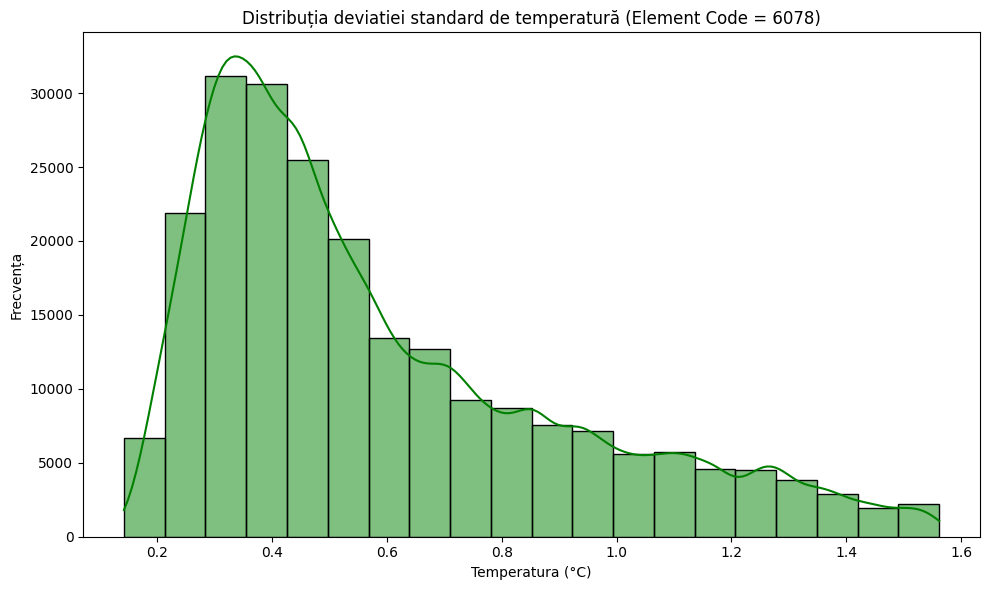

In [190]:
# Filtrăm doar rândurile în care 'Element Code' este 7271
df_temperature_change = df_combined_cleaned[df_combined_cleaned['Element Code'] == 6078]

# Creăm histogramă pentru distribuția temperaturilor doar pentru 'Element Code' = 7271
plt.figure(figsize=(10, 6))

sns.histplot(df_temperature_change['Value'], kde=True, color='g', bins=20)
plt.title('Distribuția deviatiei standard de temperatură (Element Code = 6078)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecvența')
plt.tight_layout()
plt.show()

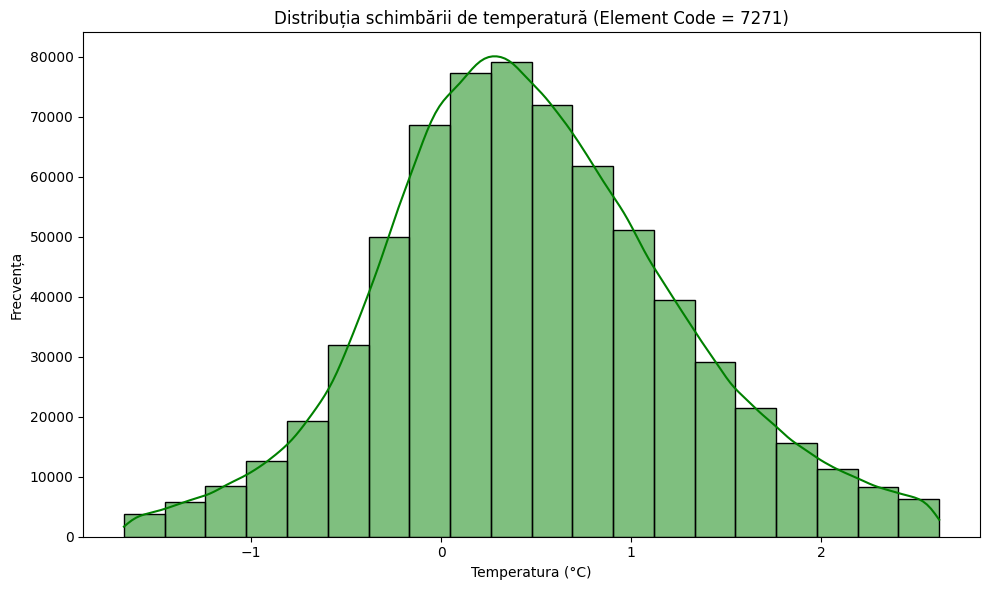

In [191]:
# Filtrăm doar rândurile în care 'Element Code' este 7271
df_temperature_change = df_combined_cleaned[df_combined_cleaned['Element Code'] == 7271]

# Creăm histogramă pentru distribuția temperaturilor doar pentru 'Element Code' = 7271
plt.figure(figsize=(10, 6))

sns.histplot(df_temperature_change['Value'], kde=True, color='g', bins=20)
plt.title('Distribuția schimbării de temperatură (Element Code = 7271)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecvența')
plt.tight_layout()
plt.show()

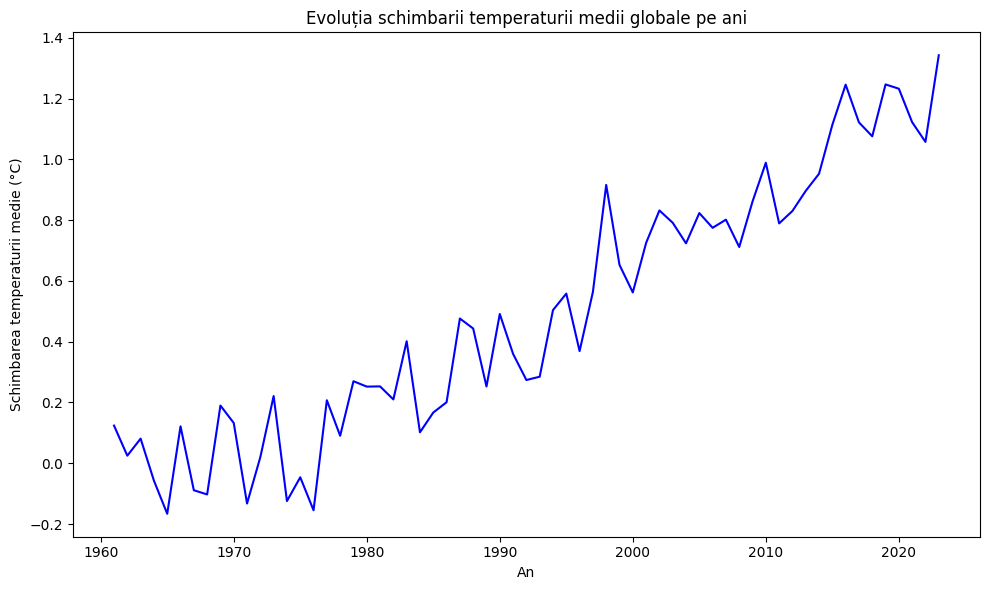

In [192]:
plt.figure(figsize=(10, 6))
df_temperature_change = df_combined_cleaned[df_combined_cleaned['Element Code'] == 7271]
# Calculăm media temperaturii pe an
df_avg_yearly = df_temperature_change.groupby('Year')['Value'].mean().reset_index()

# Creăm line plot-ul
sns.lineplot(data=df_avg_yearly, x='Year', y='Value', color='b')
plt.title('Evoluția schimbarii temperaturii medii globale pe ani')
plt.xlabel('An')
plt.ylabel('Schimbarea temperaturii medie (°C)')
plt.tight_layout()
plt.show()

In [193]:
df_temp_change=df_combined_cleaned[df_combined_cleaned['Element Code'] == 7271]
df_standard_dev=df_combined_cleaned[df_combined_cleaned['Element Code'] == 6078]

In [194]:
#Scalare
from sklearn.preprocessing import RobustScaler

# Crearea unui obiect RobustScaler
robust_scaler_temp = RobustScaler()
robust_scaler_dev = RobustScaler()

# Aplicarea la date
df_robust_scaled_temp_change = robust_scaler_temp.fit_transform(df_temp_change[['Value']])
df_robust_scaled_std_dev = robust_scaler_dev.fit_transform(df_standard_dev[['Value']])
df_temp_change.loc[:, 'Value'] = df_robust_scaled_temp_change
df_standard_dev.loc[:, 'Value'] = df_robust_scaled_std_dev
print(df_temp_change.head())
print(df_standard_dev.head())

   Area Code  Months Code  Element Code  Year     Value
0          2         7001          7271  1961  0.355159
1          2         7003          7271  1961  0.096230
2          2         7005          7271  1961  0.985119
3          2         7006          7271  1961 -0.473214
4          2         7007          7271  1961  0.461310
        Area Code  Months Code  Element Code  Year     Value
673105          2         7003          6078  1961  2.446301
673106          2         7004          6078  1961  2.193317
673107          2         7005          6078  1961  1.773270
673108          2         7006          6078  1961  1.057279
673109          2         7007          6078  1961  0.233890


In [195]:
from sklearn.preprocessing import LabelEncoder

# Crearea unui obiect LabelEncoder
label_encoder_area = LabelEncoder()
label_encoder_months = LabelEncoder()
# Aplică Label Encoding pentru "Area Code" și "Months Code" în df_temp_change_normalized
df_temp_change.loc[:,'Area Code'] = label_encoder_area.fit_transform(df_temp_change['Area Code'])
df_temp_change.loc[:,'Months Code'] = label_encoder_months.fit_transform(df_temp_change['Months Code'])

# Aplică Label Encoding pentru "Area Code" și "Months Code" în df_standard_dev_normalized
df_standard_dev.loc[:,'Area Code'] = label_encoder_area.fit_transform(df_standard_dev['Area Code'])
df_standard_dev.loc[:,'Months Code'] = label_encoder_months.fit_transform(df_standard_dev['Months Code'])

# Verifică primele rânduri din fiecare DataFrame pentru a te asigura că modificările au fost aplicate corect
print(df_temp_change.head())
print(df_standard_dev.head())
df_temp_change.to_csv("df_temp_change.csv", index=False)
df_standard_dev.to_csv("df_standard_dev.csv", index=False)

   Area Code  Months Code  Element Code  Year     Value
0          1            0          7271  1961  0.355159
1          1            2          7271  1961  0.096230
2          1            4          7271  1961  0.985119
3          1            5          7271  1961 -0.473214
4          1            6          7271  1961  0.461310
        Area Code  Months Code  Element Code  Year     Value
673105          0            2          6078  1961  2.446301
673106          0            3          6078  1961  2.193317
673107          0            4          6078  1961  1.773270
673108          0            5          6078  1961  1.057279
673109          0            6          6078  1961  0.233890
